# 1. Pre-Processing by Juan Palacio
* Handle missing values, one-hot encoding, and scaling.
* Prepare and clean the dataset for analysis.

### Exploring Raw data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import numpy as np


rawdataset = pd.read_csv('https://raw.githubusercontent.com/manikanta9430/airbnb-analysis/main/AB_NYC_2019.csv')

rawdataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
rawdataset.shape

(48895, 16)

In [ ]:
rawdataset.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
rawdataset.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
rawdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
rawdataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
duplicate_rows = rawdataset[rawdataset.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [ ]:

# Check for NaN values
nan_values = rawdataset.isna().sum()
print("NaN values per column:\n", nan_values)

# Check for blank strings (empty strings)
blank_strings = (rawdataset == '').sum()
print("\nBlank string values per column:\n", blank_strings)

#Combined check
def check_missing_or_blank(df):
    missing_values = df.isna().sum()
    blank_values = (df == '').sum()
    combined_missing = missing_values + blank_values
    return combined_missing

combined_missing = check_missing_or_blank(rawdataset)
print("\nCombined missing (NaN or blank) values per column:\n", combined_missing)

NaN values per column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Blank string values per column:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
r

#### Feature Engineering - Data imputation

As part of our feature engineering class, we reviewed some steps to handle missing values,
either by imputation or deletion. It was noted in class that when deleting data, it’s best to
delete less than 0.1% of the data. So, I assume with imputation, we should still aim for
balance.

Steps:


1.   Filled missing reviews_per_month with 0, assuming no reviews occurred.
2.   For last_review, I used a placeholder date (1900-01-01) for listings with no reviews and filled missing values for others with the median review date.
3.  Replaced missing or blank name fields with “No Listing Name” to ensure all listings have a title.

4.  Replaced missing or blank host_name fields with “No Host Name” so every host is identified.


In [ ]:
rawdataset['last_review'] = pd.to_datetime(rawdataset['last_review'], errors='coerce')
rawdataset['reviews_per_month'] = rawdataset['reviews_per_month'].fillna(0)
rawdataset.loc[rawdataset['number_of_reviews'] == 0, 'last_review'] = pd.Timestamp('1900-01-01')
median_last_review = rawdataset.loc[rawdataset['number_of_reviews'] > 0, 'last_review'].median()
rawdataset['last_review'] = rawdataset['last_review'].fillna(median_last_review)
rawdataset['name'] = rawdataset['name'].fillna('No Listing Name')
rawdataset['host_name'] = rawdataset['host_name'].fillna('No Host Name')
print(rawdataset.isnull().sum())  # Check for remaining missing values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
# prompt: export to csv rawdataset

import pandas as pd

# Assuming 'rawdataset' DataFrame is already created as in your provided code

# Export the DataFrame to a CSV file
rawdataset.to_csv('rawdataset.csv', index=False)  # index=False prevents writing row indices to the file

# 2. Exploratory Data Analysis
* Create visualizations for feature distributions and
* Analyze target variable and address class imbalance.

In [ ]:
dataStep2 = rawdataset.copy()

# 1. Lets checkout Basic Overview and Data Summary
print("Dataset Shape:", dataStep2.shape)
print("\nDataset Info:")
print(dataStep2.info())
print("\nSummary Statistics:")
print(dataStep2.describe())

Dataset Shape: (48895, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights              


Missing Values per Column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


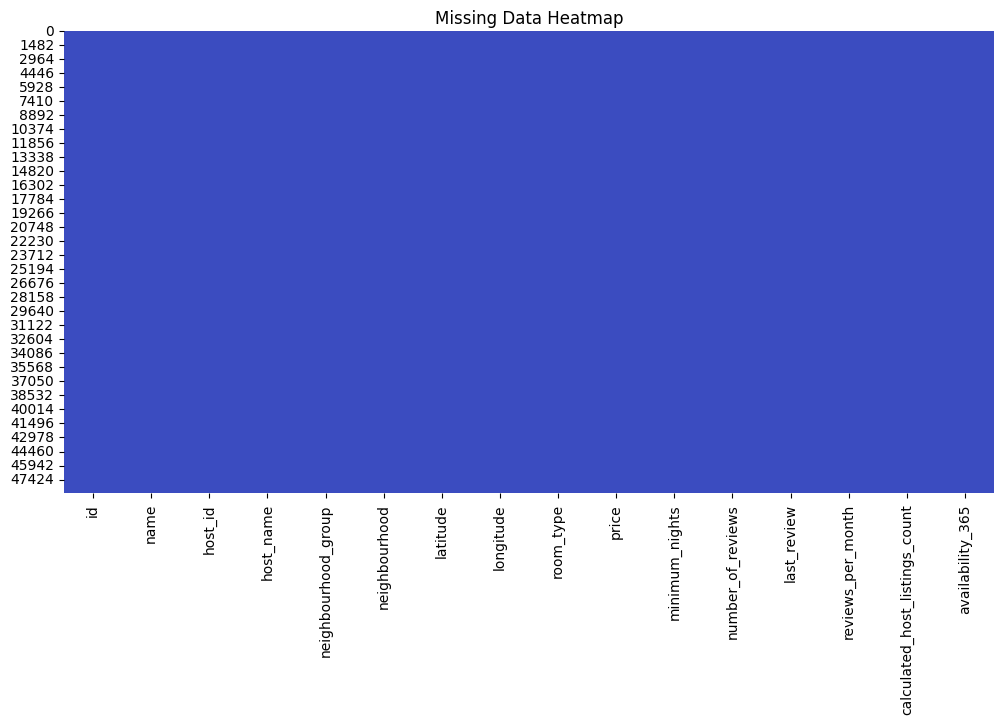

In [ ]:
# 2. Analysing Missing Values
print("\nMissing Values per Column:")
print(dataStep2.isnull().sum())

# Visualizing missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataStep2.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Data Heatmap")
plt.show()

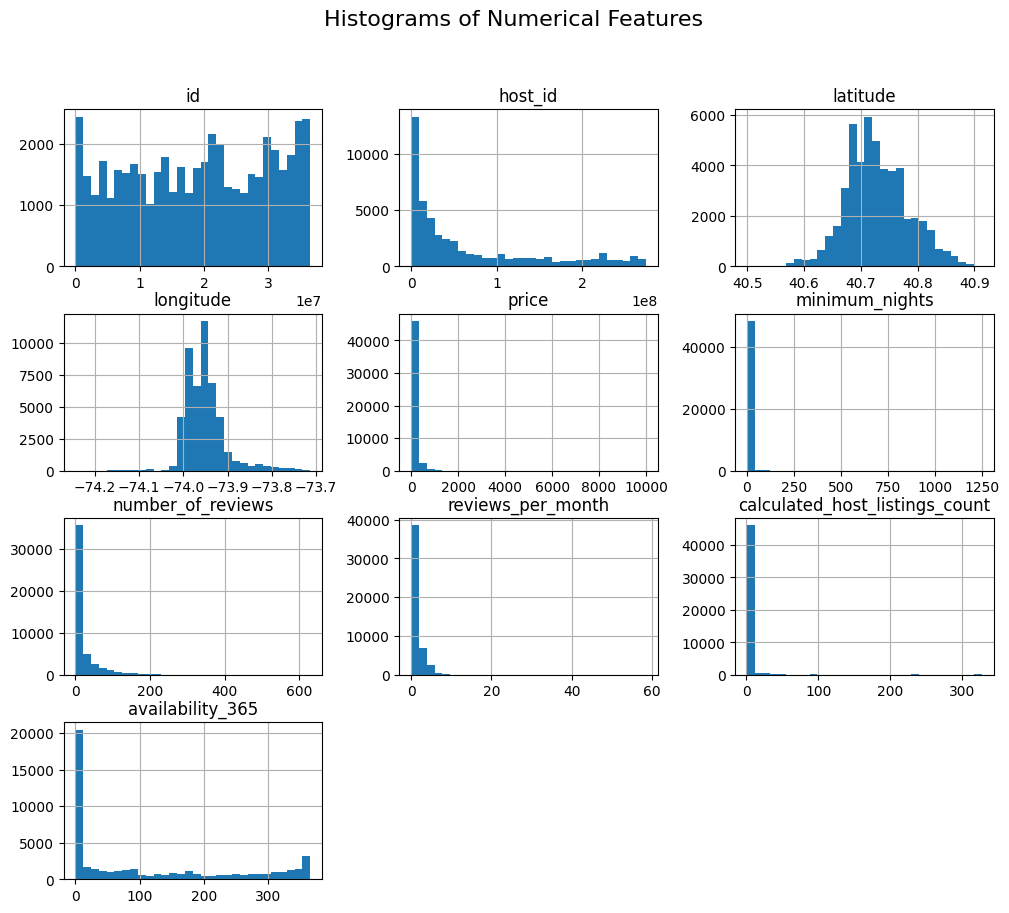

In [ ]:
# 3. Distribution of Numerical Variables
numerical_cols = dataStep2.select_dtypes(include=['int64', 'float64']).columns
dataStep2[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", size=16)
plt.show()

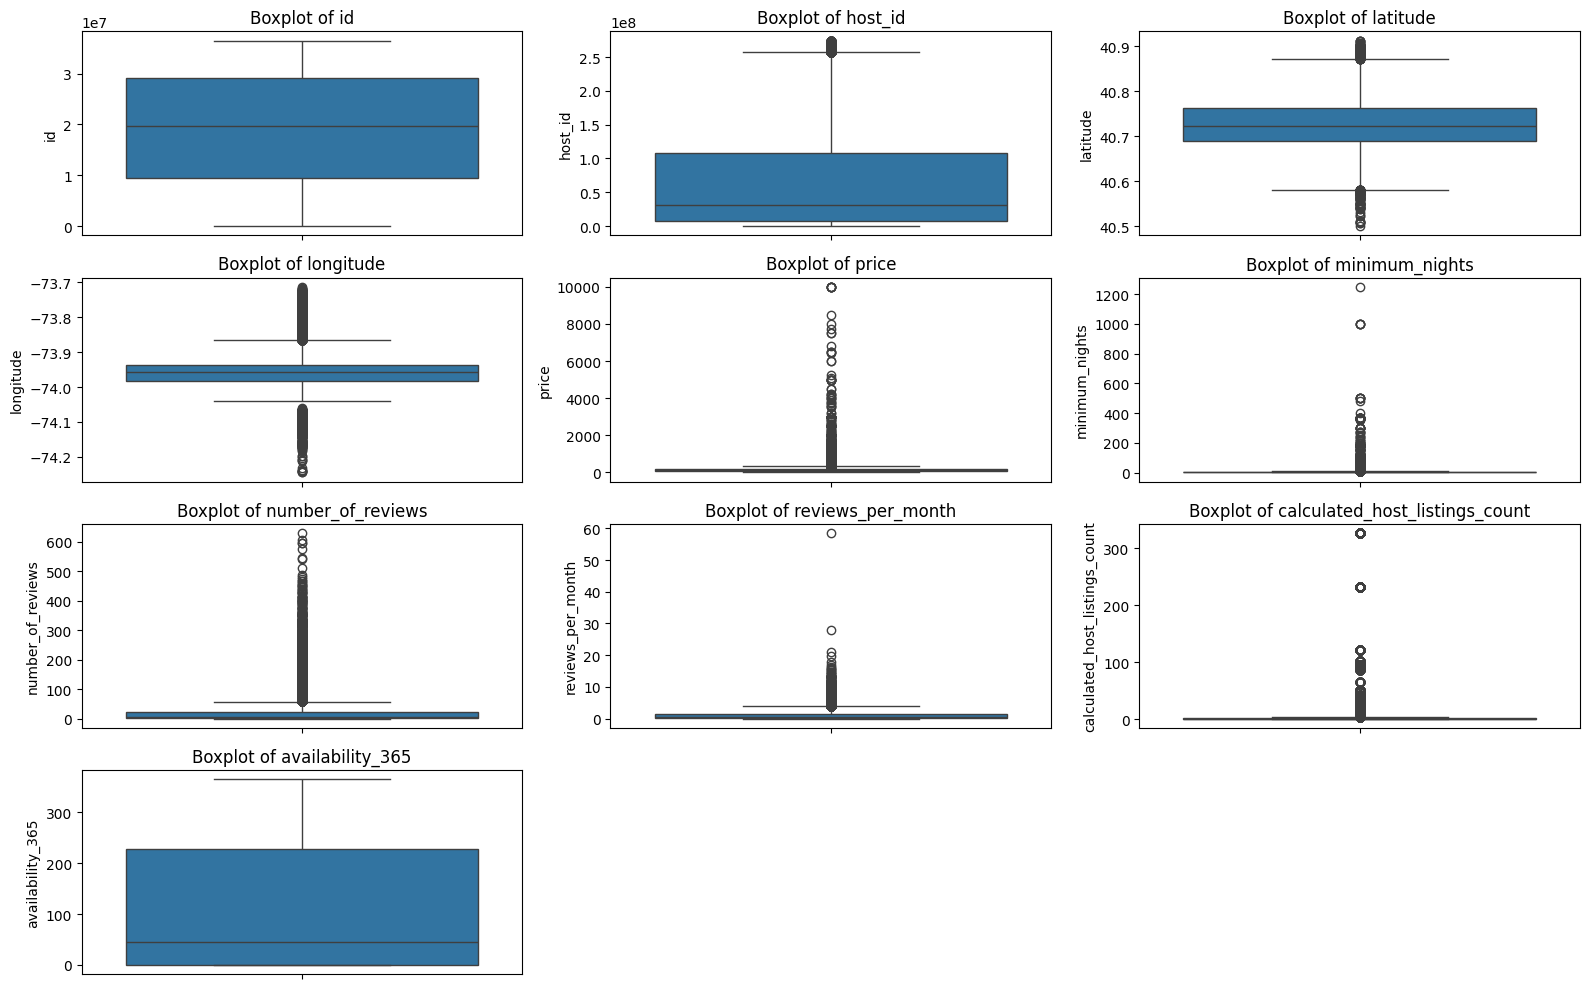

In [ ]:
# 4. Boxplots for Outlier Detection
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i)
    sns.boxplot(data=dataStep2[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

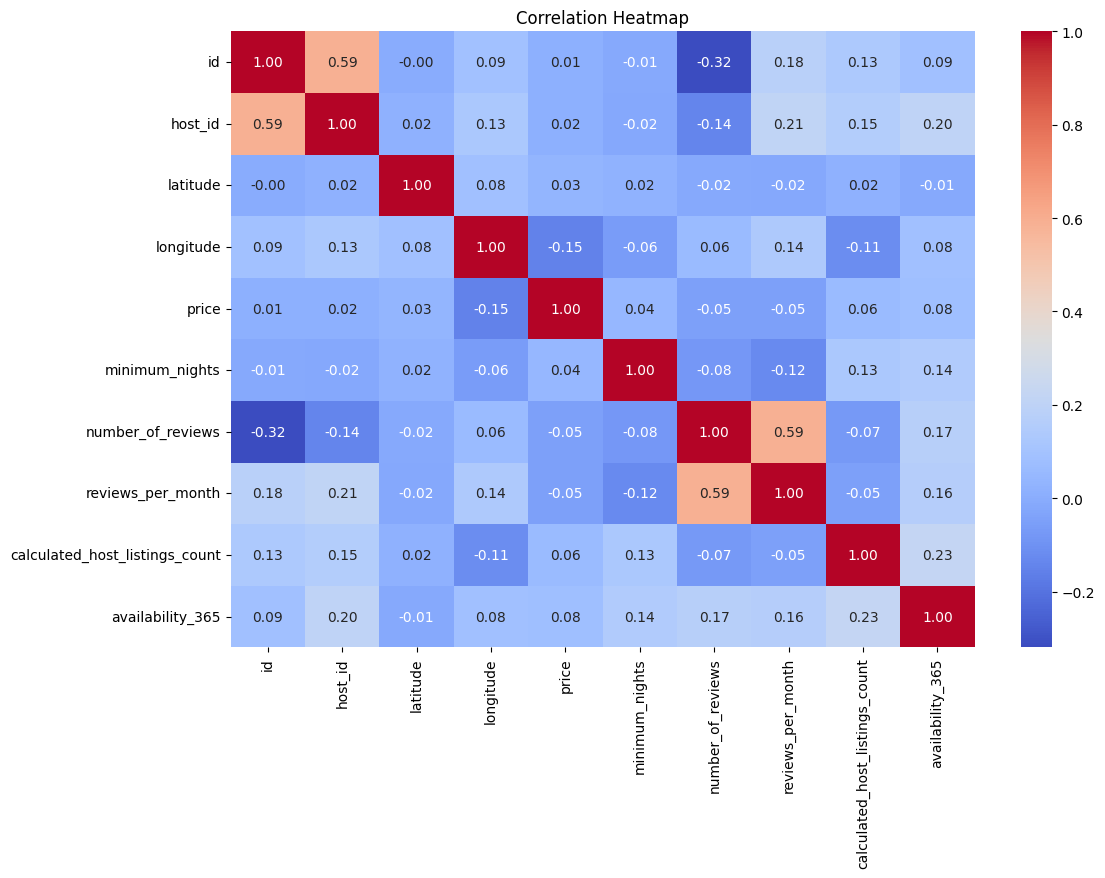

In [ ]:
# 5. Correlation Heatmap
corr = dataStep2[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

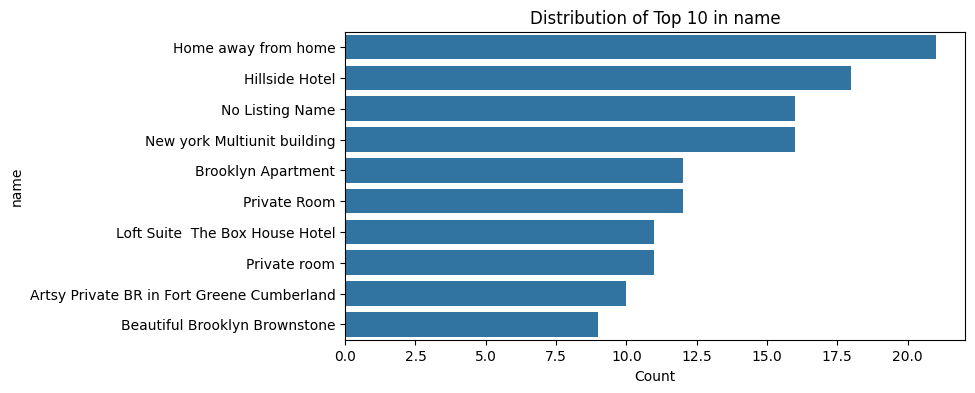

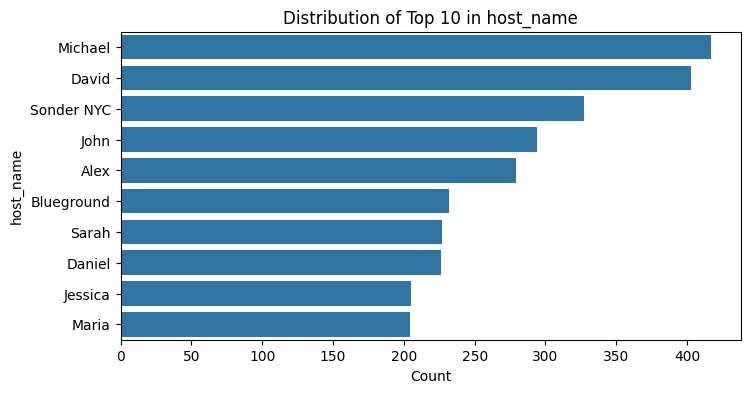

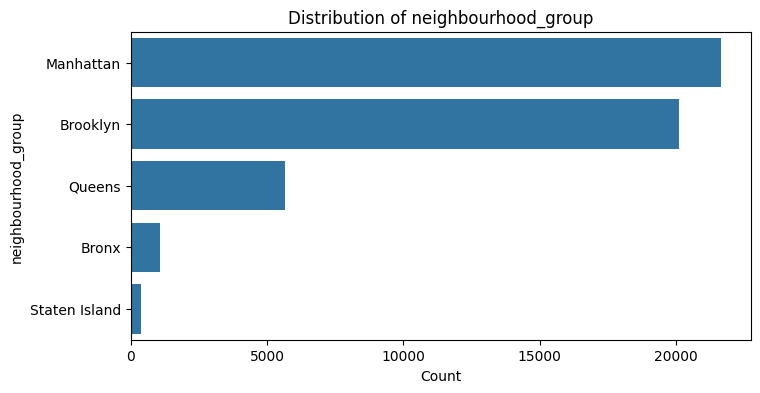

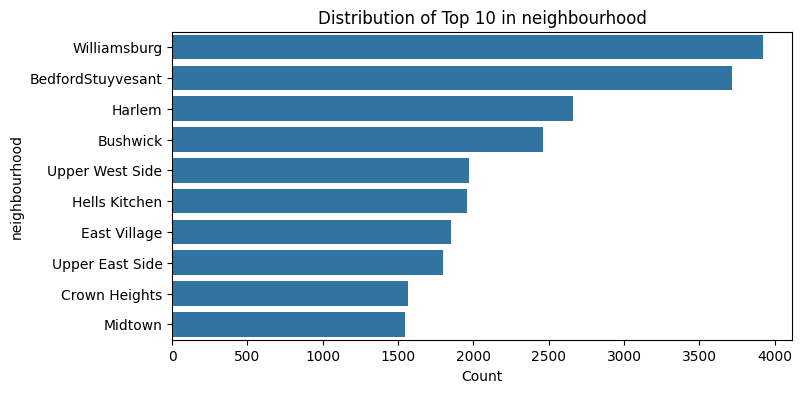

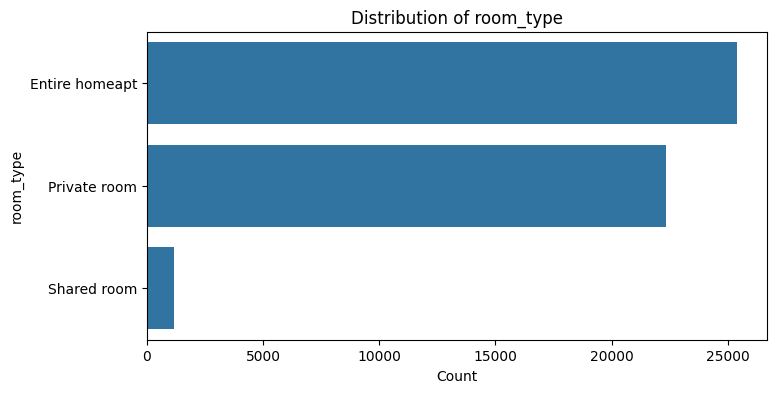

In [ ]:
# 6. Analyzing Categorical Variables with Optimizations
categorical_cols = dataStep2.select_dtypes(include=['object']).columns
def clean_text(text):
    try:
        # Removing special characters, non-printable characters, Keeping only alphanumeric and space
        text = re.sub(r'[^\w\s]', '', text)  #
        text = ''.join(char for char in text if char.isprintable())
        return text
    except Exception:
        return text  # Return if cleaning fails

for col in categorical_cols:
    dataStep2[col] = dataStep2[col].astype(str).apply(clean_text)

MAX_CATEGORIES = 30  # Plotting only if the number of unique categories is below this threshold
TOP_N_CATEGORIES = 10  # If above threshold, plot only the top N categories

for col in categorical_cols:
    unique_count = dataStep2[col].nunique()

    if unique_count <= MAX_CATEGORIES:
        try:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataStep2, y=col, order=dataStep2[col].value_counts().index)
            plt.title(f"Distribution of {col}")
            plt.xlabel("Count")
            plt.show()
        except Exception:
            pass
    elif unique_count > MAX_CATEGORIES:
        try:
            top_categories = dataStep2[col].value_counts().nlargest(TOP_N_CATEGORIES).index
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataStep2[dataStep2[col].isin(top_categories)], y=col, order=top_categories)
            plt.title(f"Distribution of Top {TOP_N_CATEGORIES} in {col}")
            plt.xlabel("Count")
            plt.show()
        except Exception:
            pass

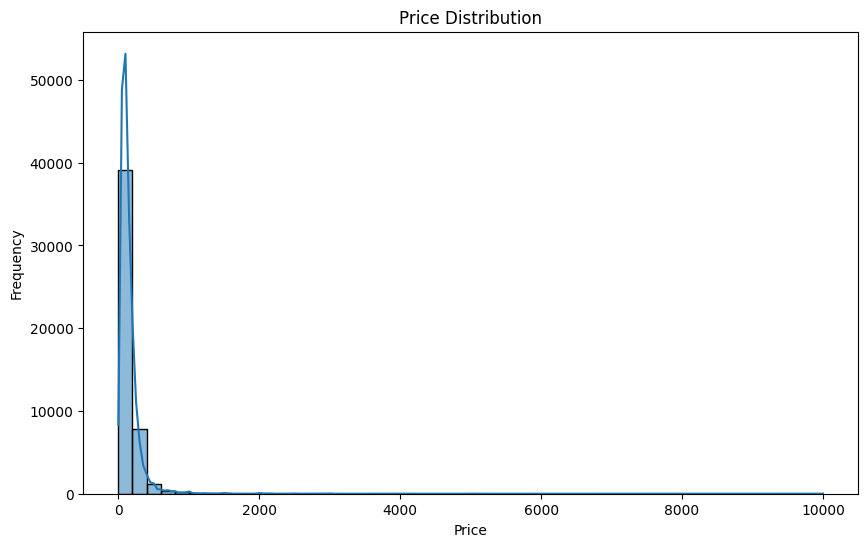

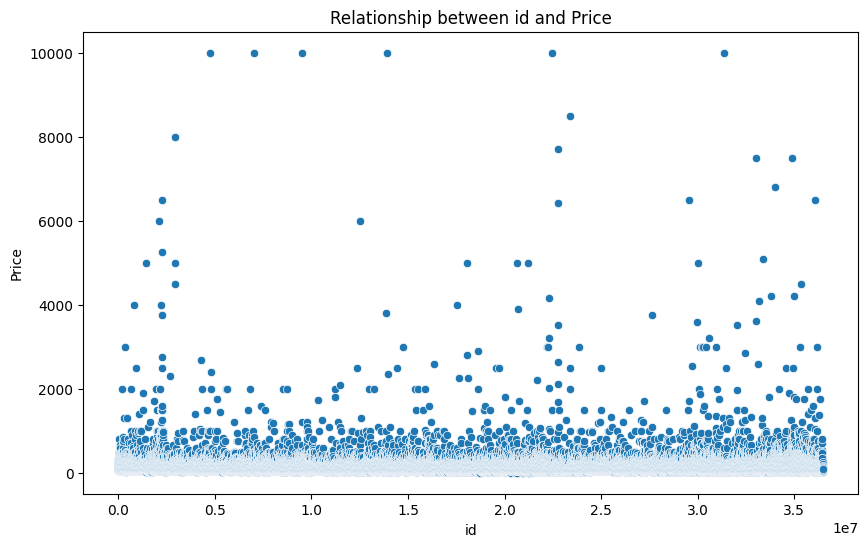

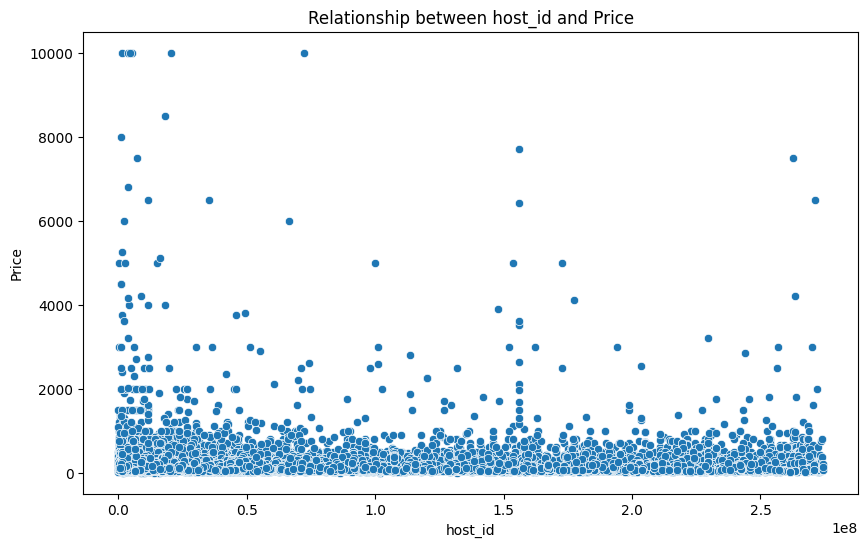

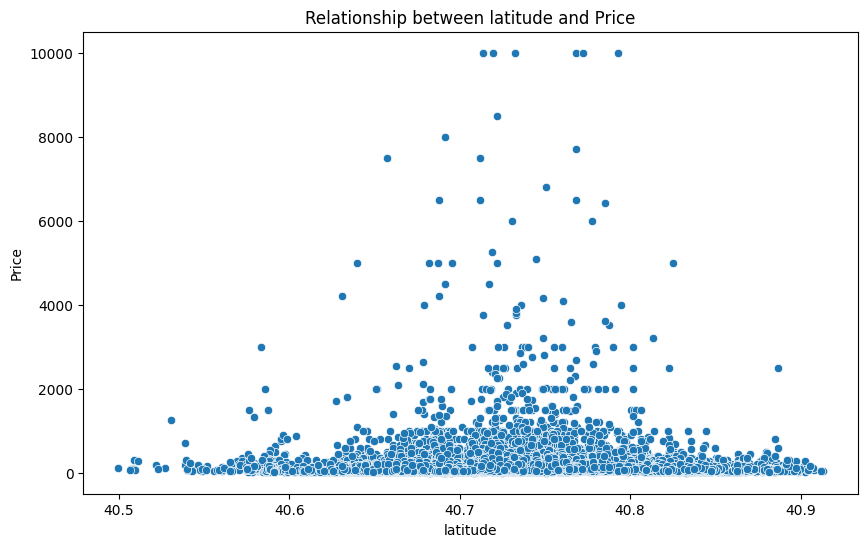

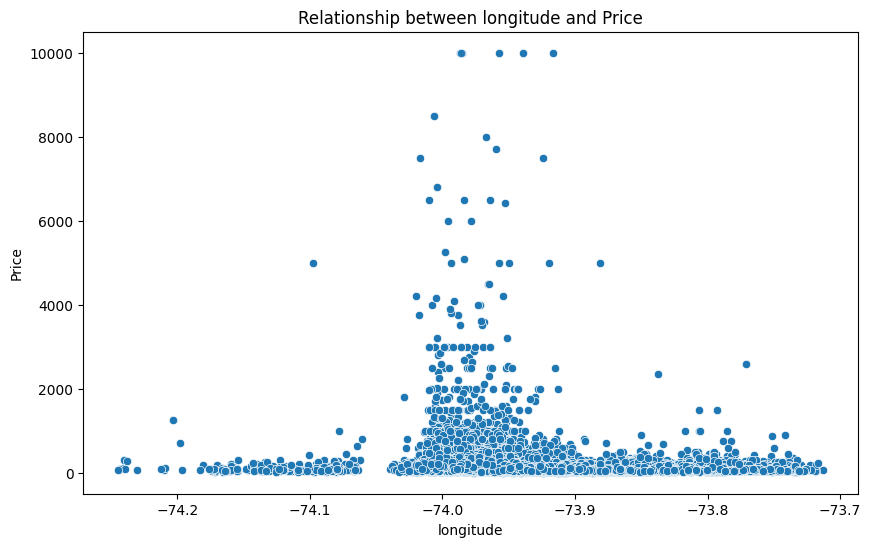

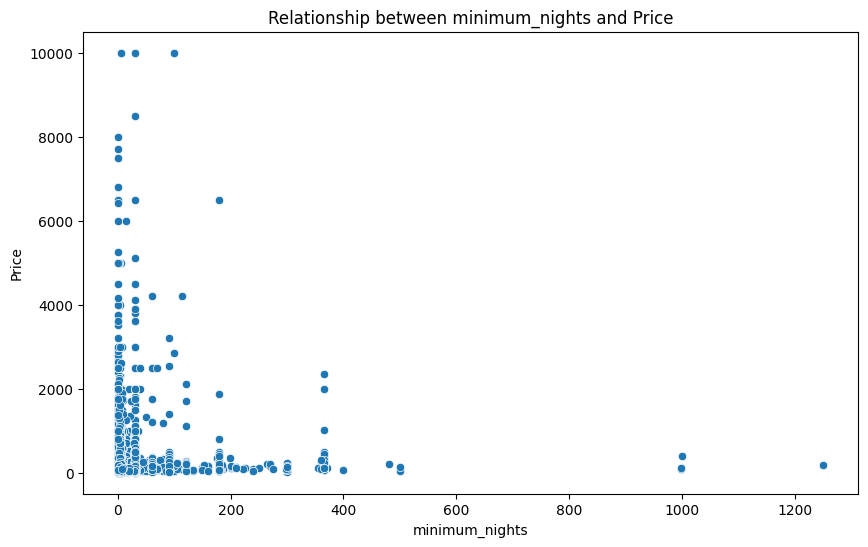

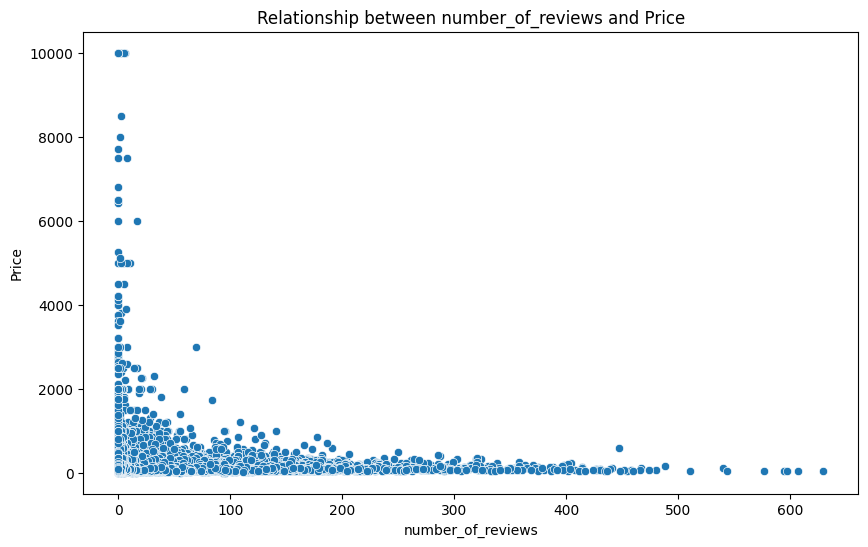

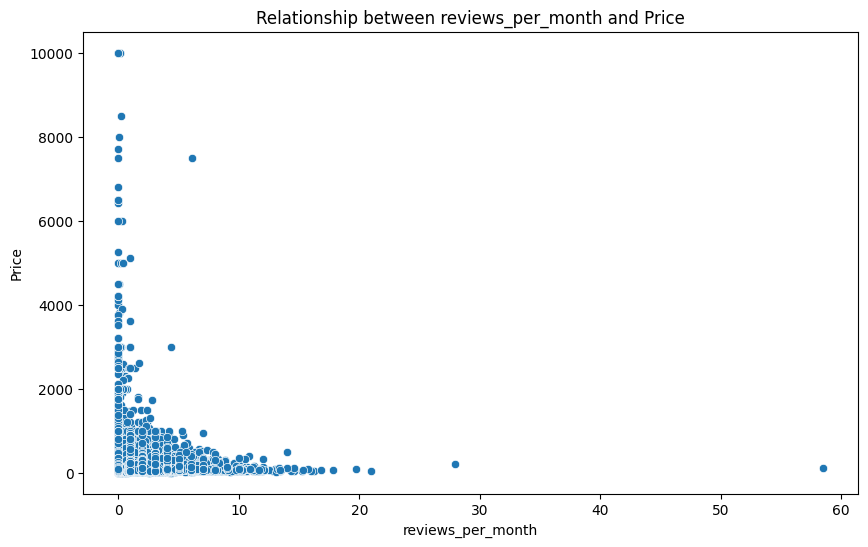

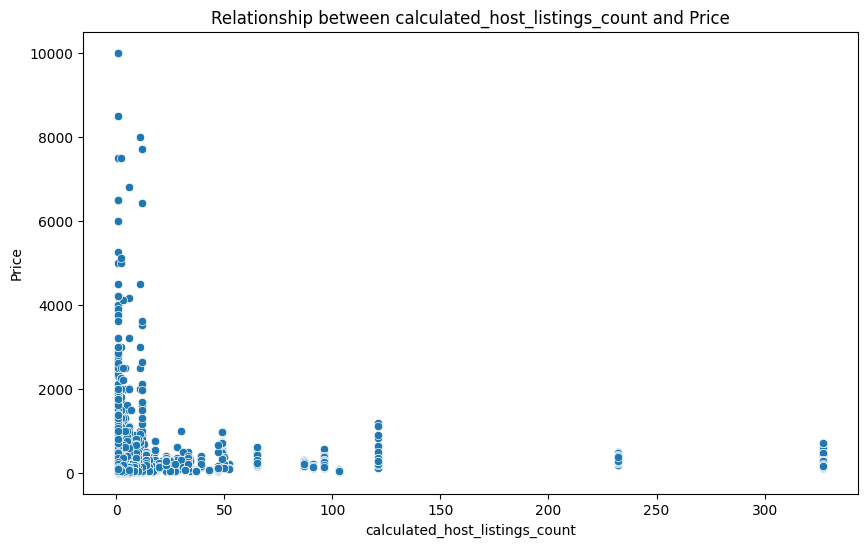

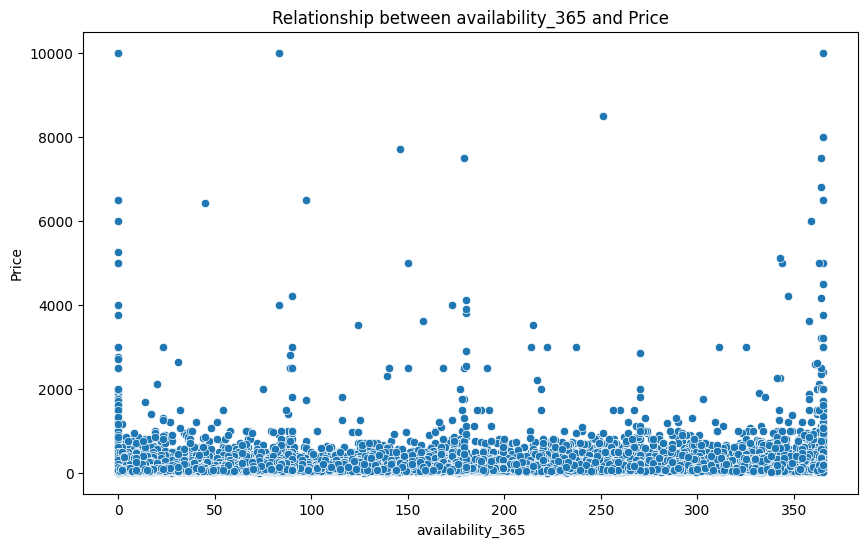

EDA completed successfully!


In [ ]:
# 7. Target Variable Analysis
# Assuming 'price' as the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dataStep2['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Analyzing relationships with 'price' (target variable)
for col in numerical_cols:
    if col != 'price':  # Excluding the target column itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=dataStep2[col], y=dataStep2['price'])
        plt.title(f"Relationship between {col} and Price")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()

print("EDA completed successfully!")

# 3. Machine Learning Models by Mayooran

* Build and tune multiple models (e.g., Logistic Regression, Random Forest).
* Compare models using metrics like F1-score, AUC-ROC, or R².
* Build multiple ML models and compare them using hyperparameter tuning (Grid search or random search) using cross-validation

In [ ]:
dataStep3 = dataStep2.copy()
#Guys use any other alias if you want

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert to datetime
dataStep3["last_review_date"] = pd.to_datetime(dataStep3["last_review"])

# Extract features
dataStep3["last_review_year"] = dataStep3["last_review_date"].dt.year
dataStep3["last_review_month"] = dataStep3["last_review_date"].dt.month
dataStep3["last_review_day"] = dataStep3["last_review_date"].dt.day

# Preprocessing for categorical and numerical data
categorical_features = ["neighbourhood_group",  "room_type" ]
dataStep3 = pd.get_dummies(dataStep3, columns=categorical_features, drop_first=False)

In [ ]:
dataStep3['NEW_total_cost'] = dataStep3['price'] * dataStep3['minimum_nights']
dataStep3['NEW_availability_ratio'] = dataStep3['availability_365'] / 365
dataStep3['NEW_daily_average_reviews'] = dataStep3['reviews_per_month'] / 30
dataStep3['NEW_annual_income'] = dataStep3['price'] * dataStep3['availability_365']
dataStep3['NEW_house_occupancy_rate'] = 365 - dataStep3['availability_365']
dataStep3['NEW_minimum_income'] = dataStep3['price'] * dataStep3['minimum_nights']

In [ ]:
dataStep3.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_date', 'last_review_year',
       'last_review_month', 'last_review_day', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'NEW_total_cost', 'NEW_availability_ratio',
       'NEW_daily_average_reviews', 'NEW_annual_income',
       'NEW_house_occupancy_rate', 'NEW_minimum_income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler # Import RobustScaler from sklearn.preprocessing

numerical_features = ['id','host_id',  'latitude',
       'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365','last_review_year',
       'last_review_month', 'last_review_day', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room',
       'room_type_Shared room', 'NEW_total_cost','NEW_availability_ratio',
       'NEW_daily_average_reviews', 'NEW_annual_income', 'NEW_house_occupancy_rate',
       'NEW_minimum_income']

scaler = RobustScaler()
dataStep3[numerical_features] = scaler.fit_transform(dataStep3[numerical_features])

In [ ]:
X = dataStep3.drop(columns=['price','name', 'host_name', 'neighbourhood', 'last_review_date', 'last_review'])  # Features
y = dataStep3['price']  # Target variable

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import time
import numpy as np

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Initialize models
models = {
    "Linear Regression (LR)": LinearRegression(),
    "Ridge Regression (Ridge)": Ridge(alpha=1.0),
    "Lasso Regression (Lasso)": Lasso(alpha=0.1),
    "ElasticNet Regression (ElasticNet)": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest (RF)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting (GB)": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf', C=1.0),
    "XGBoost (XGB)": XGBRegressor(random_state=42),
    "LightGBM (LGBM)": LGBMRegressor(random_state=42)
}

In [ ]:
# Train and evaluate each model
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append({"Model": name, "R² Score": round(r2, 6)})

# Create a DataFrame to display the results
r2_scores_df = pd.DataFrame(r2_scores)
print(r2_scores_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.020e+08, tolerance: 2.307e+05
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3378
[LightGBM] [Info] Number of data points in the train set: 39116, number of used features: 26
[LightGBM] [Info] Start training from score 153.483357
                                Model  R² Score
0              Linear Regression (LR)  0.545984
1            Ridge Regression (Ridge)  0.545983
2            Lasso Regression (Lasso)  0.545831
3  ElasticNet Regression (ElasticNet)  0.544438
4                  Random Forest (RF)  0.936678
5              Gradient Boosting (GB)  0.914412
6      Support Vector Regressor (SVR)  0.106138
7                       XGBoost (XGB)  0.846398
8                     LightGBM (LGBM)  0.854450


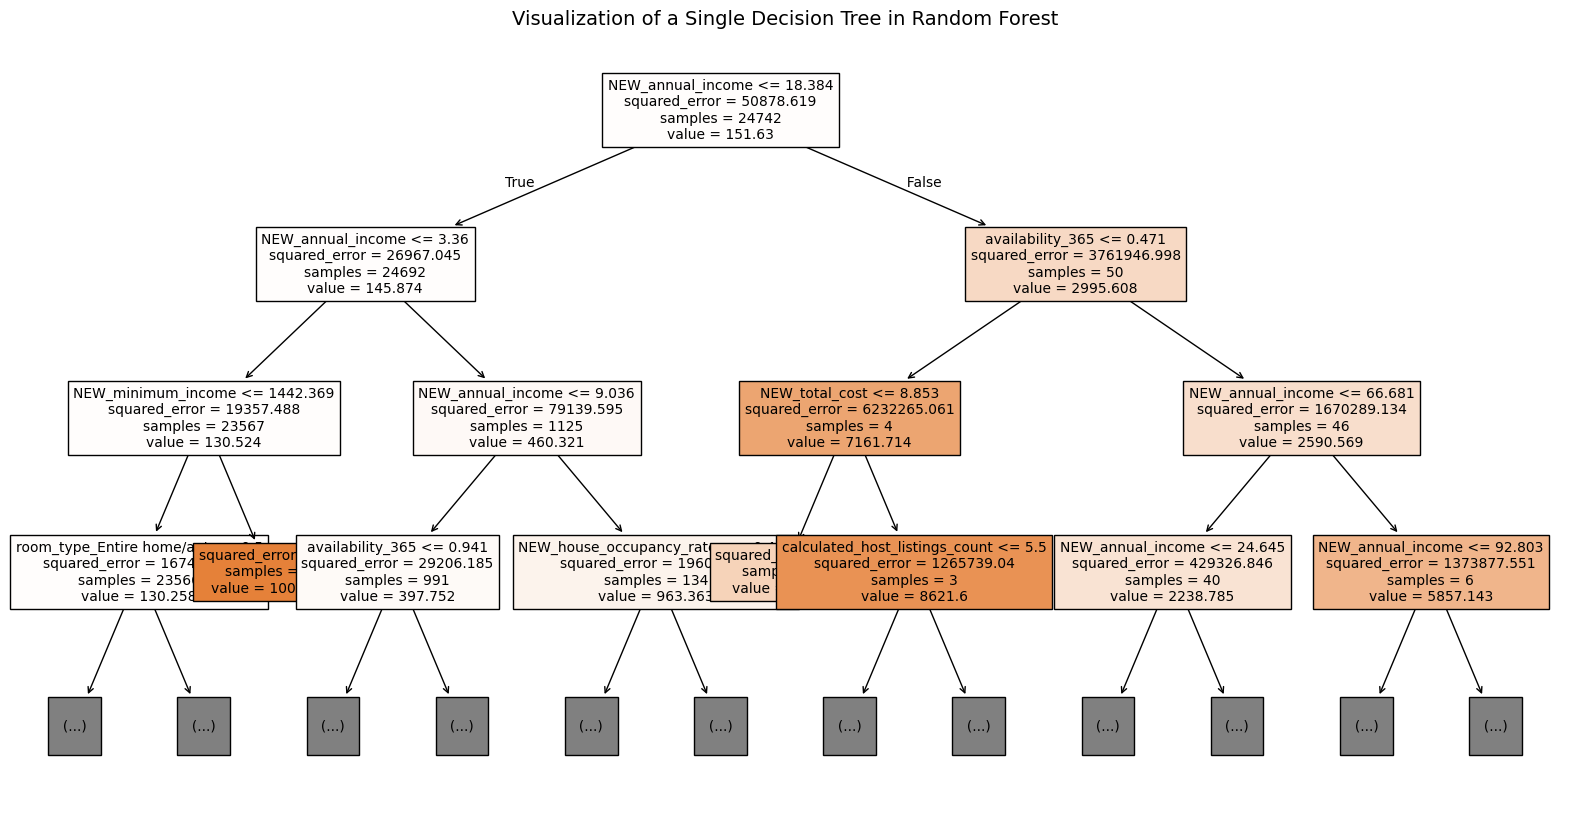

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# After fitting the Random Forest (e.g., "Random Forest (RF)")
best_rf = models["Random Forest (RF)"]

# Plot a single decision tree (e.g., the first tree in the forest)
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[5],  # Replace 0 with the index of the tree
          feature_names=X_train.columns,
          filled=True,
          max_depth=3,  # Optional: Limit the depth for better readability
          fontsize=10)
plt.title("Visualization of a Single Decision Tree in Random Forest", fontsize=14)
plt.show()

#Multi Layer Perceptron
Since Airbnb data is typically structured in tabular form, MLPs are well-suited for such data. Here, we will train a MLP model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,369 (71.75 KB)

 Trainable params: 18,369 (71.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 45345.8789 - val_loss: 19380.1055
Epoch 2/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27763.8125 - val_loss: 19910.9121
Epoch 3/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 46998.3906 - val_loss: 16731.9199
Epoch 4/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 20988.2012 - val_loss: 17410.7422
Epoch 5/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 12409.2852 - val_loss: 21083.8711
Epoch 6/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12818.2217 - val_loss: 15002.2275
Epoch 7/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14040.1133 - val_loss: 16158.2295
Epoch 8/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11026.8184 - val_loss: 14216.6113
Epoch 9/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8916.9307 - val_loss: 15712.3096
Epoch 10/100
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6665.0459 - val_loss: 12833.5625
Epoch 11/100
1223/1223 ━━━━━━━━

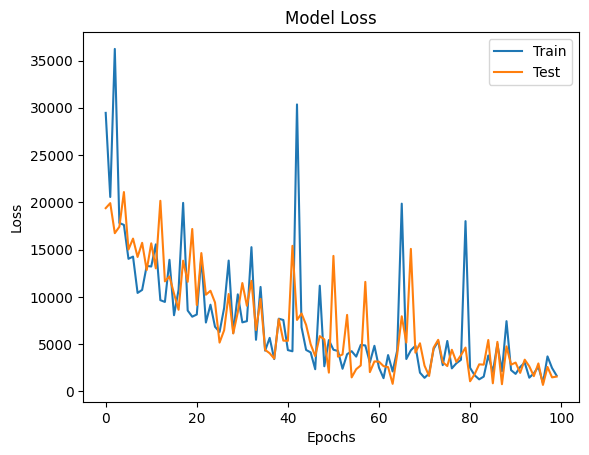

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dataStep4 = dataStep3.copy()

X = dataStep4.drop(columns=['price', 'name', 'host_name', 'neighbourhood', 'last_review_date', 'last_review'])  # Features
y = dataStep4['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = Sequential()

# Add input layer (64 neurons) and first hidden layer with ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add more hidden layers (128 neurons and 64 neurons, respectively)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add output layer for price prediction (no activation function for regression)
model.add(Dense(1))

# Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer=Adam(), loss='mean_squared_error')
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


# Make predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f'R²: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
# Show the first 5 predictions
print(predictions[:5])
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Now let's compare the models with highest R2 scores with changing the hyperparameters using grid search while doing a cross validation

In [ ]:
# Nested Cross validation and hyperparameter selection using Grid search

from sklearn.model_selection import cross_validate, GridSearchCV

def do_cross_validation(name, clf, print_model=False):
    cv = cross_validate(clf, X, y, scoring='r2', cv=3)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated accuracy of {name}: ({scores}) / 3 = {mean_:.2f}'

    if print_model:
        msg = f'{clf}:\n\t{msg}\n'

    print(msg)

In [ ]:
do_cross_validation("SVR", LinearRegression(), print_model=True)

LinearRegression():
	Cross-validated accuracy of SVR: (0.47 + 0.58 + 0.70) / 3 = 0.58



In [ ]:
do_cross_validation("RF", RandomForestRegressor(n_estimators=100, random_state=42), print_model=True)

RandomForestRegressor(random_state=42):
	Cross-validated accuracy of RF: (0.79 + 0.89 + 0.94) / 3 = 0.87



In [ ]:
for name, model in models.items():
    if name == "Random Forest (RF)":
      model_from_gridSearch = GridSearchCV(RandomForestRegressor(random_state=0), param_grid={'n_estimators': [100, 50]})

    elif name == "Gradient Boosting (GB)":
      model_from_gridSearch = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid={'n_estimators': [100, 50]})

    elif name == "XGBoost (XGB)":
      model_from_gridSearch = GridSearchCV(XGBRegressor(random_state=0), param_grid={'n_estimators': [100, 50]})

    elif name == "LightGBM (LGBM)":
      model_from_gridSearch = GridSearchCV(LGBMRegressor(random_state=0), param_grid={'n_estimators': [100, 50]})

    else: continue

    do_cross_validation(name, model_from_gridSearch, print_model=False)

# 4. Model Interpretation & Presentation

* Interpret models (e.g., feature importance, SHAP values).
* Create final report, slides, and assist with video editing.

First, we compare these models accuracy on train and test data.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming dataStep5 is defined earlier in the code
dataStep4 = dataStep3.copy()

X = dataStep4.drop(columns=['price', 'name', 'host_name', 'neighbourhood', 'last_review_date', 'last_review'])  # Features
y = dataStep4['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


def create_model_result(name, r2_train_cv, r2_test, mae, mse, rmse):
    return pd.DataFrame({
        'model': [name],
        'r2_train_cv': [r2_train_cv],
        'r2_test': [r2_test],
        'mae': [mae],
        'mse': [mse],
        'rmse': [rmse]
    })

# Fit and evaluate function
def fit_evaluate(model, X_train, y_train, X_test, y_test):
    if model == "MLP":  # Special handling for MLP
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Define the MLP model
        mlp_model = Sequential()
        mlp_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
        mlp_model.add(Dense(128, activation='relu'))
        mlp_model.add(Dense(64, activation='relu'))
        mlp_model.add(Dense(1))
        mlp_model.compile(optimizer=Adam(), loss='mean_squared_error')

        # Train the MLP model
        history = mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))

        # Make predictions
        y_pred = mlp_model.predict(X_test_scaled).flatten()

        # Compute metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        result = pd.DataFrame(
            [["MLP", None, r2, mae, mse, rmse]],
            columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
        )
        return result, history
    else:  # Standard handling for traditional models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cross = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2').mean() * 100
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        result = pd.DataFrame(
            [[type(model).__name__, cross, r2, mae, mse, rmse]],
            columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
        )
        return result, None

# Replace `models.items()` with your actual model dictionary and dataset
# models = {
#     # Add your models here (e.g., 'LinearRegression': LinearRegression())
#     # Example:
#     # 'LinearRegression': LinearRegression(),
#     # 'RandomForest': RandomForestRegressor(),
# }

# Initialize an empty DataFrame to store results
result_models = pd.DataFrame(columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse'])
mlp_history = None

for name, model in models.items():
    if name == "MLP":
        results, history = fit_evaluate(model, X_train, y_train, X_test, y_test)
        mlp_history = history  # Save the history for MLP

        # Ensure MLP result is in the right format and append it
        model_result = create_model_result(name, results['r2_train_cv'], results['r2_test'],
                                           results['mae'], results['mse'], results['rmse'])
        result_models = pd.concat([result_models, model_result], ignore_index=True)
    else:
        results, _ = fit_evaluate(model, X_train, y_train, X_test, y_test)

        # Append result for the other models
        model_result = create_model_result(name, results['r2_train_cv'], results['r2_test'],
                                           results['mae'], results['mse'], results['rmse'])
        result_models = pd.concat([result_models, model_result], ignore_index=True)

# Evaluate all models, including MLP
# for name, model in models.items():
#     if name == "MLP":
#         results, history = fit_evaluate(model, X_train, y_train, X_test, y_test)
#         mlp_history = history  # Save the history for MLP
#     else:
#         results, _ = fit_evaluate(model, X_train, y_train, X_test, y_test)
#     result_models = pd.concat([result_models, results])

# # Sort models by R² Test score
result_models.sort_values(by='r2_test', ascending=False, inplace=True)

# # Visualization of all models including MLP
# plt.figure(figsize=(20, 10))

# # Plot R² Test Scores
# plt.subplot(1, 2, 1)
# sns.barplot(y='r2_test', x='model', data=result_models)
# plt.title("R² Test Scores by Model")
# plt.xticks(rotation=45)

# # Plot R² Cross-Validation Scores
# plt.subplot(1, 2, 2)
# sns.barplot(y='r2_train_cv', x='model', data=result_models)
# plt.title("R² Cross-Validation Scores by Model")
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# Plot MLP training and validation loss if history exists
if mlp_history:
    plt.figure(figsize=(10, 6))
    plt.plot(mlp_history.history['loss'], label='Training Loss')
    plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
    plt.title('MLP Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
# dataStep4 = dataStep3.copy()

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns




# # # Cross-validation function
# # def cross_val(model):
# #     scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2')  # Using R² for regression
# #     return scores.mean() * 100

# # Fit and evaluate function
# # def fit_evaluate(model, X_train, y_train, X_test, y_test):
# #     model.fit(X_train, y_train)
# #     y_pred = model.predict(X_test)
# #     cross = cross_val(model)

# #     # Regression metrics
# #     mae = mean_absolute_error(y_test, y_pred)
# #     mse = mean_squared_error(y_test, y_pred)
# #     rmse = mean_squared_error(y_test, y_pred, squared=False)
# #     r2 = r2_score(y_test, y_pred)

# #     # Collect results in a DataFrame
# #     result = pd.DataFrame(
# #         [[type(model).__name__, cross, r2, mae, mse, rmse]],
# #         columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
# #     )
# #     return result

# # # Evaluate all models
# # result_models = pd.DataFrame(columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse'])
# # for name, model in models.items():
# #     results = fit_evaluate(model, X_train, y_train, X_test, y_test)
# #     result_models = pd.concat([result_models, results])

# # # Sort results by R² score
# # result_models.sort_values(by='r2_test', ascending=False, inplace=True)

# # # Visualization
# # plt.subplots(figsize=(20, 10))
# # plt.subplot(1, 2, 1)
# # sns.barplot(y='r2_test', x='model', data=result_models.sort_values(by='r2_test', ascending=False))
# # plt.title("R² Test Scores by Model")
# # plt.xticks(rotation=45)

# # plt.subplot(1, 2, 2)
# # sns.barplot(y='r2_train_cv', x='model', data=result_models.sort_values(by='r2_test', ascending=False))
# # plt.title("R² Cross-Validation Scores by Model")
# # plt.xticks(rotation=45)

# # plt.tight_layout()
# # plt.show()


# # Add MLP as a custom model in the dictionary


# def fit_evaluate(model, X_train, y_train, X_test, y_test):
#     if model == "MLP":  # Special handling for MLP
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_test_scaled = scaler.transform(X_test)

#         # Define the MLP model
#         mlp_model = Sequential()
#         mlp_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
#         mlp_model.add(Dense(128, activation='relu'))
#         mlp_model.add(Dense(64, activation='relu'))
#         mlp_model.add(Dense(1))
#         mlp_model.compile(optimizer=Adam(), loss='mean_squared_error')

#         # Train the MLP model
#         history = mlp_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))

#         # Make predictions
#         y_pred = mlp_model.predict(X_test_scaled).flatten()

#         # Compute metrics
#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)
#         rmse = np.sqrt(mse)
#         r2 = r2_score(y_test, y_pred)

#         result = pd.DataFrame(
#             [["MLP", None, r2, mae, mse, rmse]],
#             columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
#         )
#         return result, history
#     else:  # Standard handling for traditional models
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         cross = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2').mean() * 100
#         mae = mean_absolute_error(y_test, y_pred)
#         mse = mean_squared_error(y_test, y_pred)
#         rmse = np.sqrt(mse)
#         r2 = r2_score(y_test, y_pred)
#         result = pd.DataFrame(
#             [[type(model).__name__, cross, r2, mae, mse, rmse]],
#             columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
#         )
#         return result, None

# # Evaluate all models, including MLP
# result_models = pd.DataFrame(columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse'])
# mlp_history = None

# for name, model in models.items():
#     if name == "MLP":
#         results, history = fit_evaluate(model, X_train, y_train, X_test, y_test)
#         mlp_history = history  # Save the history for MLP
#     else:
#         results, _ = fit_evaluate(model, X_train, y_train, X_test, y_test)
#     result_models = pd.concat([result_models, results])

# # Sort and visualize results
# result_models.sort_values(by='r2_test', ascending=False, inplace=True)

# plt.subplots(figsize=(20, 10))
# plt.subplot(1, 2, 1)
# sns.barplot(y='r2_test', x='model', data=result_models.sort_values(by='r2_test', ascending=False))
# plt.title("R² Test Scores by Model")
# plt.xticks(rotation=45)

# plt.subplot(1, 2, 2)
# sns.barplot(y='r2_train_cv', x='model', data=result_models.sort_values(by='r2_test', ascending=False))
# plt.title("R² Cross-Validation Scores by Model")
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# # Plot MLP training and validation loss if history exists
# # if mlp_history:
# #     plt.figure(figsize=(10, 6))
# #     plt.plot(mlp_history.history['

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

dataStep5 = dataStep3.copy()

X = dataStep5.drop(columns=['price', 'name', 'host_name', 'neighbourhood', 'last_review_date', 'last_review'])  # Features
y = dataStep5['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Fit and evaluate function
def fit_evaluate(model, X_train, y_train, X_test, y_test):
    if model == "MLP":  # Special handling for MLP
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Define the MLP model
        mlp_model = Sequential()
        mlp_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
        mlp_model.add(Dense(128, activation='relu'))
        mlp_model.add(Dense(64, activation='relu'))
        mlp_model.add(Dense(1))
        mlp_model.compile(optimizer=Adam(), loss='mean_squared_error')

        # Train the MLP model
        history = mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))

        # Make predictions
        y_pred = mlp_model.predict(X_test_scaled).flatten()

        # Compute metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        result = pd.DataFrame(
            [["MLP", None, r2, mae, mse, rmse]],
            columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
        )
        return result, history
    else:  # Standard handling for traditional models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cross = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2').mean() * 100
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        result = pd.DataFrame(
            [[type(model).__name__, cross, r2, mae, mse, rmse]],
            columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse']
        )
        return result, None

# Evaluate all models, including MLP
result_models = pd.DataFrame(columns=['model', 'r2_train_cv', 'r2_test', 'mae', 'mse', 'rmse'])
mlp_history = None

# Replace `models.items()` with your actual model dictionary and dataset
for name, model in models.items():
    if name == "MLP":
        results, history = fit_evaluate(model, X_train, y_train, X_test, y_test)
        mlp_history = history  # Save the history for MLP
    else:
        results, _ = fit_evaluate(model, X_train, y_train, X_test, y_test)
    result_models = pd.concat([result_models, results])

# Sort models by R² Test score
result_models.sort_values(by='r2_test', ascending=False, inplace=True)

# Visualization of all models including MLP
plt.figure(figsize=(20, 10))

# Plot R² Test Scores
plt.subplot(1, 2, 1)
sns.barplot(y='r2_test', x='model', data=result_models)
plt.title("R² Test Scores by Model")
plt.xticks(rotation=45)

# Plot R² Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.barplot(y='r2_train_cv', x='model', data=result_models)
plt.title("R² Cross-Validation Scores by Model")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot MLP training and validation loss if history exists
if mlp_history:
    plt.figure(figsize=(10, 6))
    plt.plot(mlp_history.history['loss'], label='Training Loss')
    plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
    plt.title('MLP Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()




In [ ]:
result_models_sorted_r2 = result_models.sort_values(by='r2_test', ascending=False)
result_models_sorted_r2['rank_r2_test'] = result_models_sorted_r2['r2_test'].rank(ascending=False)

result_models_sorted_cv = result_models.sort_values(by='r2_train_cv', ascending=False)
result_models_sorted_cv['rank_r2_train_cv'] = result_models_sorted_cv['r2_train_cv'].rank(ascending=False)

result_models_sorted_mae = result_models.sort_values(by='mae', ascending=True)
result_models_sorted_mae['rank_mae'] = result_models_sorted_mae['mae'].rank(ascending=True)

result_models_sorted_mse = result_models.sort_values(by='mse', ascending=True)
result_models_sorted_mse['rank_mse'] = result_models_sorted_mse['mse'].rank(ascending=True)

result_models_sorted_rmse = result_models.sort_values(by='rmse', ascending=True)
result_models_sorted_rmse['rank_rmse'] = result_models_sorted_rmse['rmse'].rank(ascending=True)

plt.subplots(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(y='r2_test', x='model', data=result_models_sorted_r2)
plt.title("R² Test Scores by Model")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(y='r2_train_cv', x='model', data=result_models_sorted_cv)
plt.title("R² Cross-Validation Scores by Model")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Sorting and Ranking for each evaluation metric

# R² Test Score (higher is better)
result_models_sorted_r2['rank_r2_test'] = result_models_sorted_r2['r2_test'].rank(ascending=False)
print("Ranking for R² Test Score:")
for index, row in result_models_sorted_r2.iterrows():
    print(f"{int(row['rank_r2_test'])}. {row['model']}: {row['r2_test']:.2f}")

# R² Cross-Validation Score (higher is better)
result_models_sorted_cv['rank_r2_train_cv'] = result_models_sorted_cv['r2_train_cv'].rank(ascending=False)
print("\nRanking for R² Cross-Validation Score:")
for index, row in result_models_sorted_cv.iterrows():
    print(f"{int(row['rank_r2_train_cv'])}. {row['model']}: {row['r2_train_cv']:.2f}")

# Mean Absolute Error (MAE) (lower is better)
result_models_sorted_mae['rank_mae'] = result_models_sorted_mae['mae'].rank(ascending=True)
print("\nRanking for MAE (Mean Absolute Error):")
for index, row in result_models_sorted_mae.iterrows():
    print(f"{int(row['rank_mae'])}. {row['model']}: {row['mae']:.2f}")

# Mean Squared Error (MSE) (lower is better)
result_models_sorted_mse['rank_mse'] = result_models_sorted_mse['mse'].rank(ascending=True)
print("\nRanking for MSE (Mean Squared Error):")
for index, row in result_models_sorted_mse.iterrows():
    print(f"{int(row['rank_mse'])}. {row['model']}: {row['mse']:.2f}")

# Root Mean Squared Error (RMSE) (lower is better)
result_models_sorted_rmse['rank_rmse'] = result_models_sorted_rmse['rmse'].rank(ascending=True)
print("\nRanking for RMSE (Root Mean Squared Error):")
for index, row in result_models_sorted_rmse.iterrows():
    print(f"{int(row['rank_rmse'])}. {row['model']}: {row['rmse']:.2f}")

